# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|What We Assume|
|:-----:|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|Numeric (> 0)|
|blue|Has bluetooth or not|Binary|
|clock speed|speed at which microprocessor executes instructions|Numeric (> 0)|
|dual sim|Has dual sim support or not|Binary|
|fc|Front Camera mega pixels|Numeric (>= 0)<br>0 means no front camera|
|four g|Has 4G or not|Binary|
|int memory|Internal Memory in Gigabytes|Numeric (> 0)|
|m dep|Mobile Depth in cm|Numeric (> 0)|
|mobile wt|Weight of mobile phone|Numeric (> 0)|
|n cores|Number of cores of processor|Numeric (> 0)|
|pc|Primary Camera mega pixels|Numeric (> 0)|
|px height|Pixel Resolution Height|Numeric (> 0)|
|px width|Pixel Resolution Width|Numeric (> 0)|
|ram|Random Access Memory in Mega Bytes|Numeric (> 0)|
|sc h|Screen Height of mobile in cm|Numeric (> 0)|
|sc w|Screen Width of mobile in cm|Numeric (> 0)|
|talk time|longest time that a single battery charge will last when you are|Numeric (> 0)|
|three g|Has 3G or not|Binary|
|touch screen|Has touch screen or not|Binary|
|wifi|Has wifi or not|Binary|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|0,1,2 or 3|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

# 1. Data Exploration and Data Cleaning.

By exploring the dataset, we found that:
- When a mobile has 4G, they also have 3G
- There is abnormality detected around px_height, px_width, sc_h, sc_w (possibly a human error)
- When a phone does not have a front camera, fc == 0
- There is a strong correlation between **front_camera** and **primary_camera** values
- There is a strong correlation between **px_height** and **px_width** values
- There is a strong correlation between **sc_h** and **sc_w** values
- Interestingly, there is **NO** correlation between **(px_width** and **sc_w)** OR **(px_height** and **sc_h)** values
- We need to determine which features to use for regression model.
- We also need to decide which features to drop when training KNN model with the chosen features

## 1.1 Data Exploration - Missing Values

We can see in below that there are some missing values in the dataset. We are going to check what they are, and then decide if we keep or drop them.<br>
**Note:** When the number of observations with the missing value is very small, dropping them will not impact much information loss.

In [1]:
import pandas as pd

df = pd.read_csv("Mobile_Price_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

In [2]:
# displaying observations with missing values.
null_data = df[df.isnull().any(axis=1)]
null_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
7,1954,0,0.5,1,0,0,24.0,0.8,187,4,...,512,NaN,700.0,16,3,5,1.0,1,1,0
20,772,0,1.1,1,12,0,39.0,NaN,81,7,...,1314,1854.0,2819.0,17,15,3,1.0,1,0,3
36,589,1,2.3,1,1,0,61.0,0.6,160,4,...,429,815.0,NaN,13,7,2,1.0,0,1,1
53,1457,0,1.9,1,1,1,16.0,0.3,102,3,...,1013,1287.0,1440.0,17,8,12,NaN,0,1,1
63,1720,0,2.0,0,15,1,NaN,0.5,168,2,...,753,1353.0,2148.0,14,2,5,1.0,1,1,2


In [3]:
# Drop them this time as the loss of information is very small.
mobile = df.dropna(axis=0)

# Drop was successful.
mobile.shape

(1995, 21)

## 1.2 Data Exploration - Statistical Descriptions of Numerical Variables

Here, we separate some variables in order to make it easy to see if there is any abnormality.<br>

Below assumptions are drawn from the meaning of the variables on the table.<br>
Any values in numerical_cols should have valid numbers e.g. px_width should be more than 0.

**Quick Summary:**<br>
-  There is *1 x dependent variable (price_range)* and *20 x independent variables*.
- Numerical variables are 'battery_power', 'clock_speed', 'fc', 'int_memory', 
                  'm_dep', 'mobile_wt', 'pc', 'px_height',
                  'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'.
                  
- categorical variables are 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range', 'n_cores'.

In [4]:
numerical_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 
                  'm_dep', 'mobile_wt', 'pc', 'px_height',
                  'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

categorical_cols = ['blue', 'dual_sim', 'four_g', 'three_g',
                    'touch_screen', 'wifi', 'price_range', 'n_cores']

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'int_memory'}>],
       [<Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>],
       [<Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>,
        <Axes: title={'center': 'sc_w'}>],
       [<Axes: title={'center': 'talk_time'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

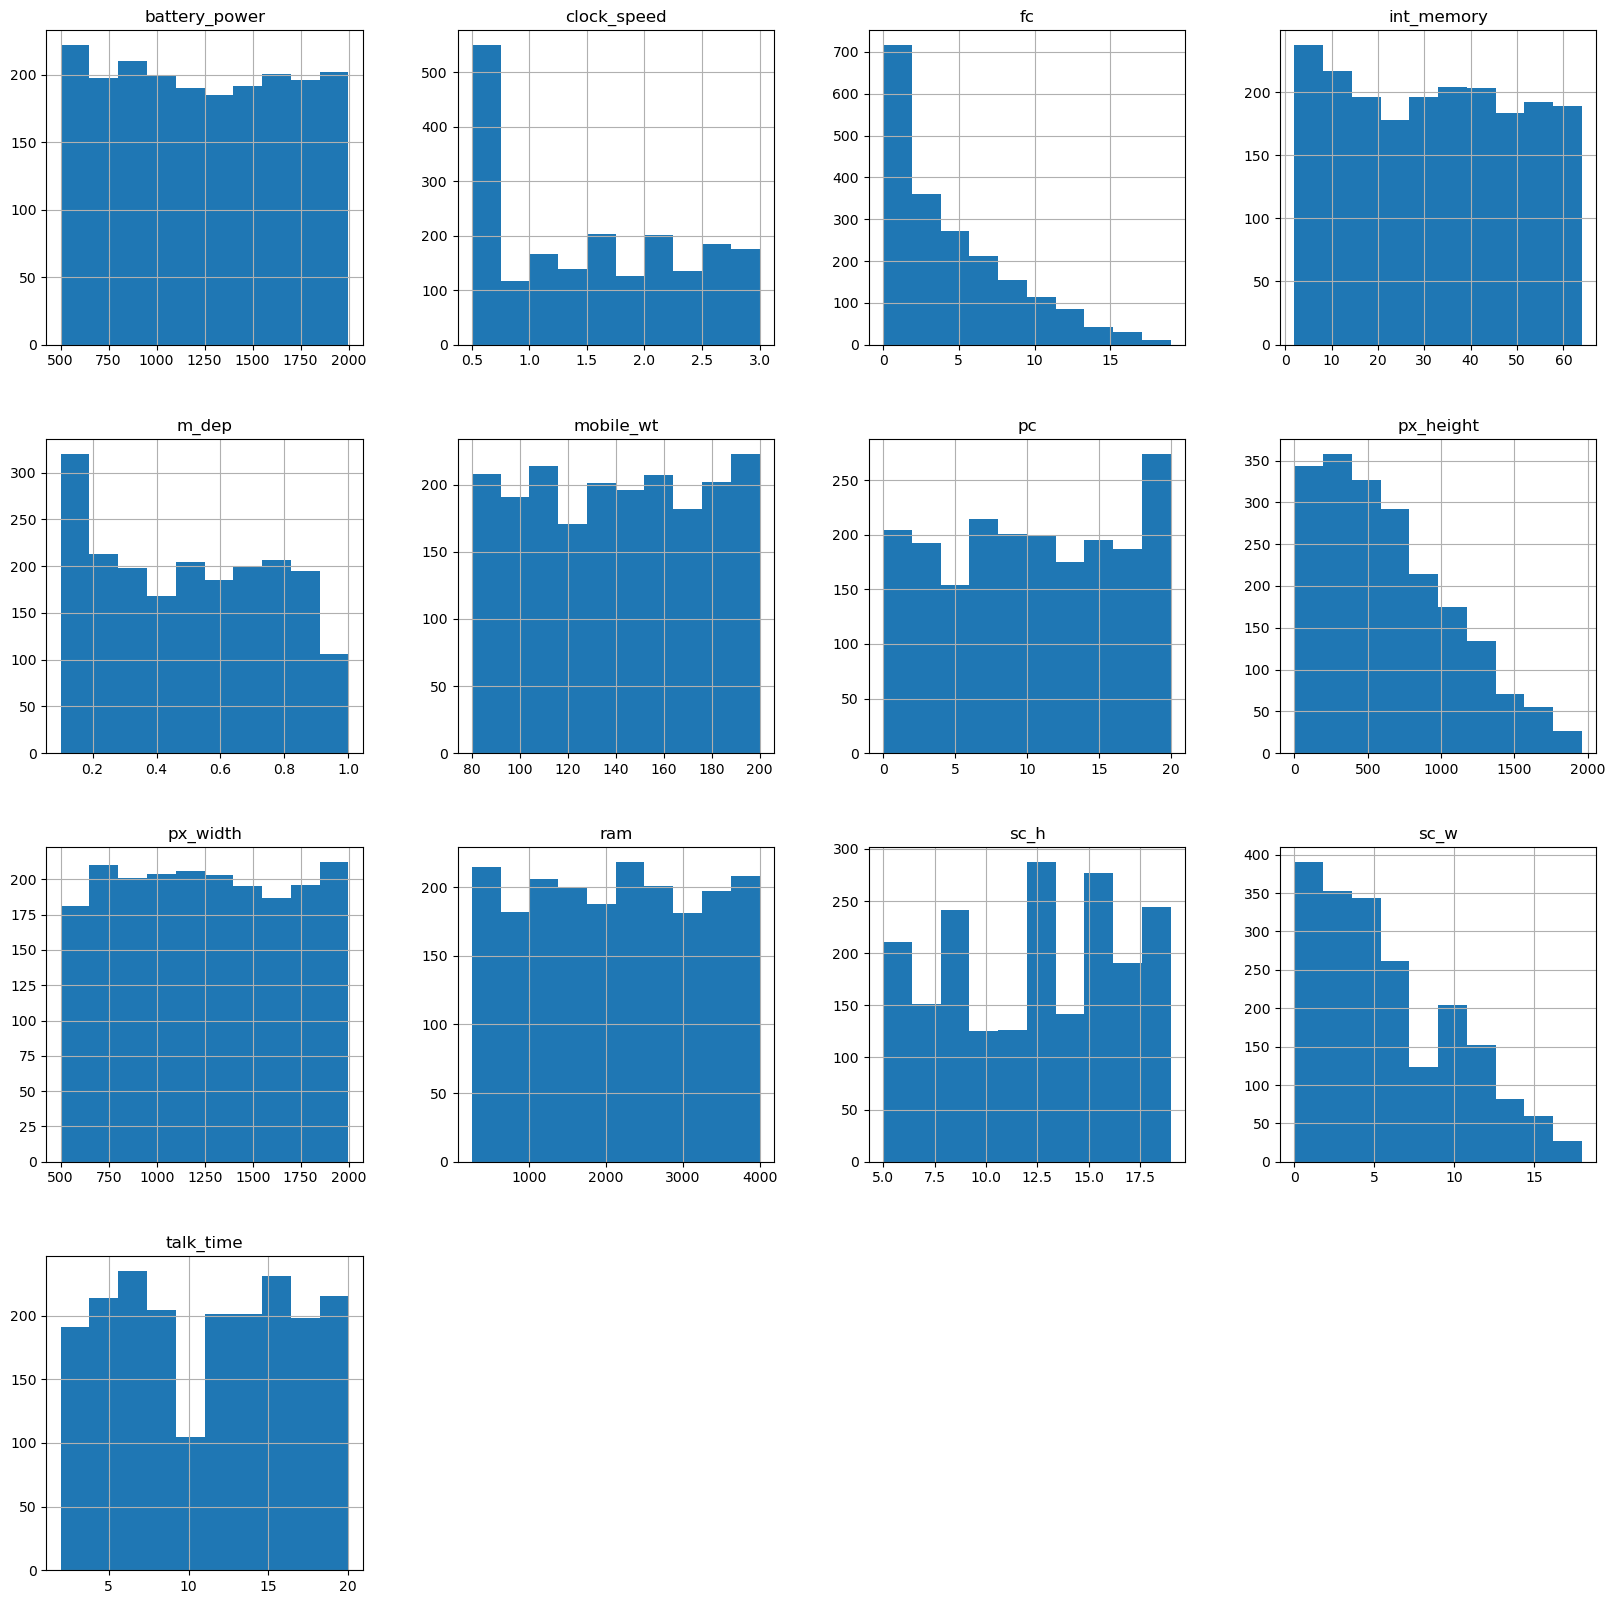

In [5]:
mobile[numerical_cols].hist(figsize=(20,20))

Text(0.5, 1.0, 'Battery Power Bosplot')

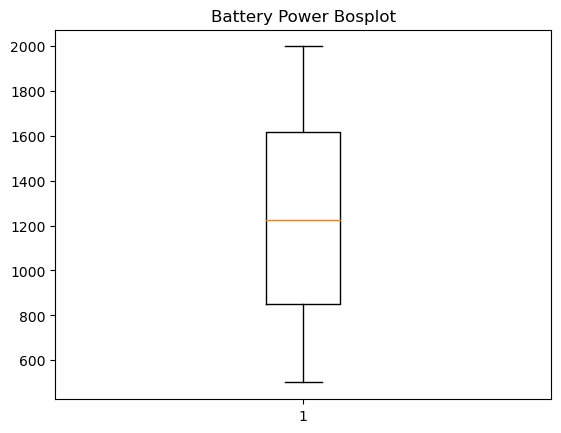

In [6]:
from matplotlib import pyplot as plt

['battery_power', 'clock_speed', 'fc', 'int_memory', 
                  'm_dep', 'mobile_wt', 'pc', 'px_height',
                  'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

plt.boxplot(mobile.battery_power)
plt.title("Battery Power Bosplot" )

Text(0.5, 1.0, 'Clock Speed Boxplot')

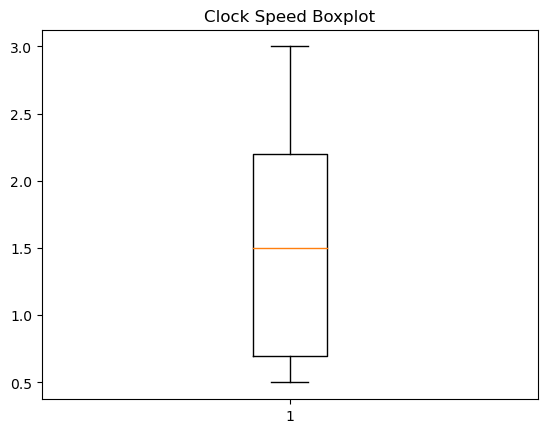

In [7]:
plt.boxplot(mobile.clock_speed)
plt.title("Clock Speed Boxplot" )

Text(0.5, 1.0, 'Front Camera Boxplot')

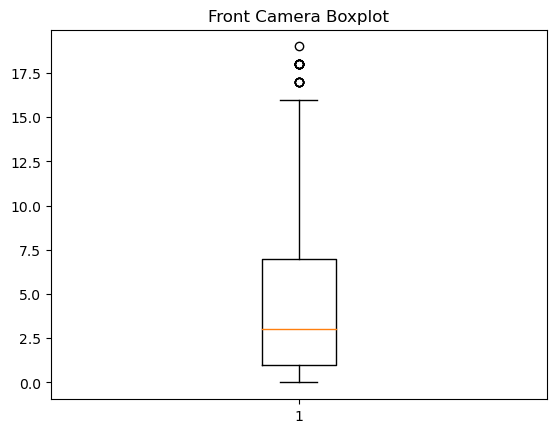

In [8]:
plt.boxplot(mobile.fc)
plt.title("Front Camera Boxplot" )

Text(0.5, 1.0, 'Int Memory Boxplot')

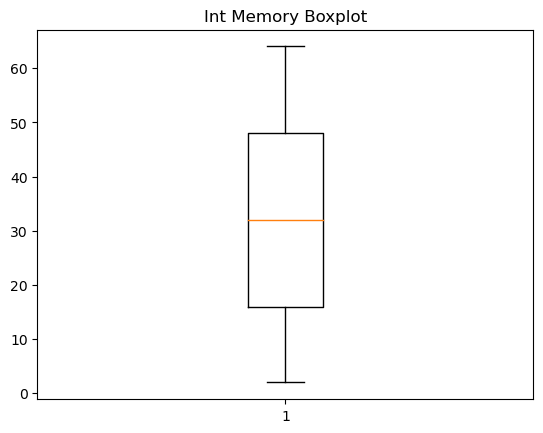

In [9]:
plt.boxplot(mobile.int_memory)
plt.title("Int Memory Boxplot" )

Text(0.5, 1.0, 'Mobile Depth Boxplot')

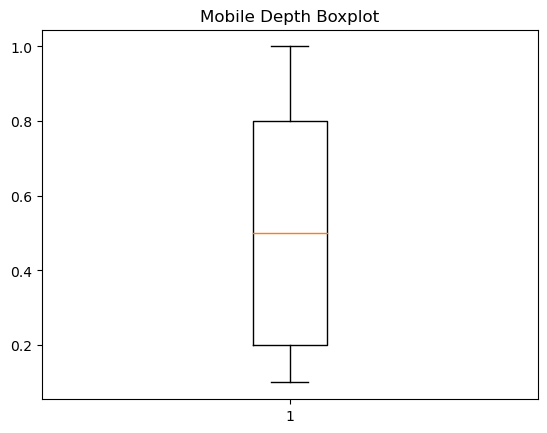

In [10]:
plt.boxplot(mobile.m_dep)
plt.title("Mobile Depth Boxplot" )

Text(0.5, 1.0, 'Mobile Weight Boxplot')

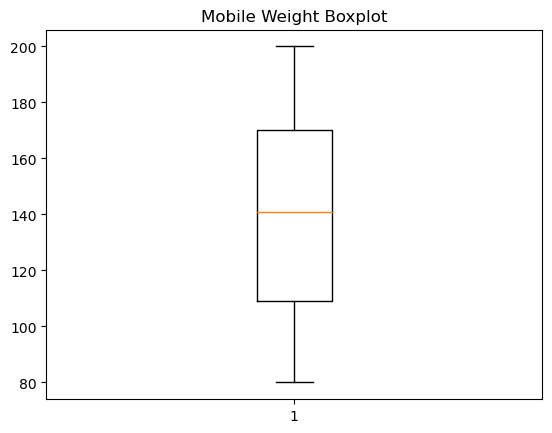

In [11]:
plt.boxplot(mobile.mobile_wt)
plt.title("Mobile Weight Boxplot" )

Text(0.5, 1.0, 'Primary Camera Boxplot')

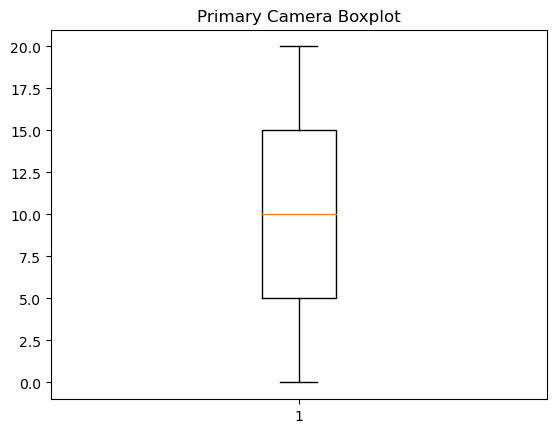

In [12]:
plt.boxplot(mobile.pc)
plt.title("Primary Camera Boxplot" )

Text(0.5, 1.0, 'Mobile Pixel Height Boxplot')

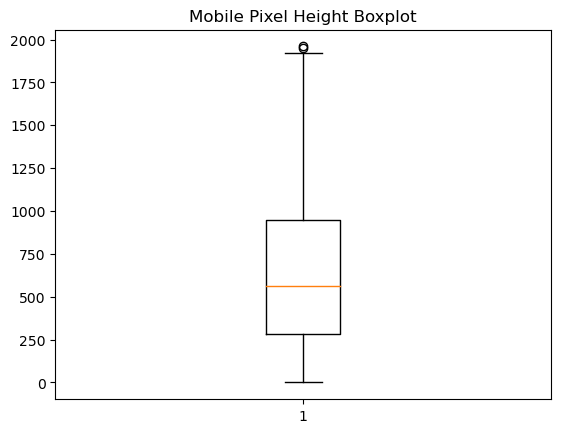

In [13]:
plt.boxplot(mobile.px_height)
plt.title("Mobile Pixel Height Boxplot" )

Text(0.5, 1.0, 'Mobile Pixel Width Boxplot')

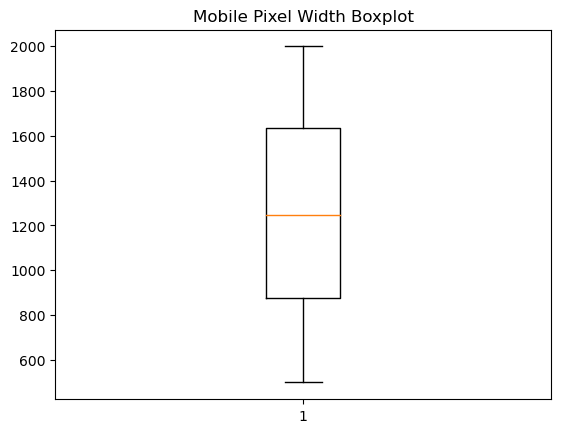

In [14]:
plt.boxplot(mobile.px_width)
plt.title("Mobile Pixel Width Boxplot" )

Text(0.5, 1.0, 'RAM Boxplot')

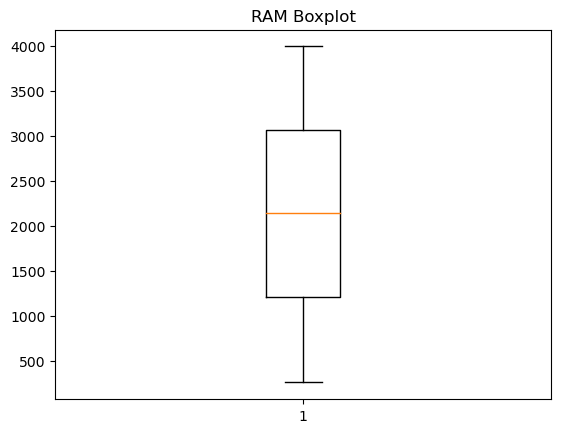

In [15]:
plt.boxplot(mobile.ram)
plt.title("RAM Boxplot" )

Text(0.5, 1.0, 'Screen Height Boxplot')

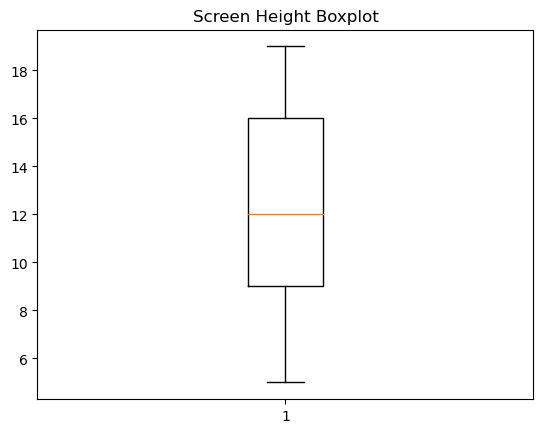

In [16]:
plt.boxplot(mobile.sc_h)
plt.title("Screen Height Boxplot" )

Text(0.5, 1.0, 'Screen Width Boxplot')

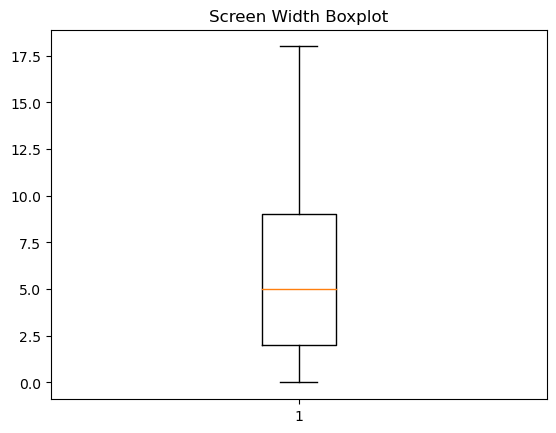

In [17]:
plt.boxplot(mobile.sc_w)
plt.title("Screen Width Boxplot" )

Text(0.5, 1.0, 'Talk Time Boxplot')

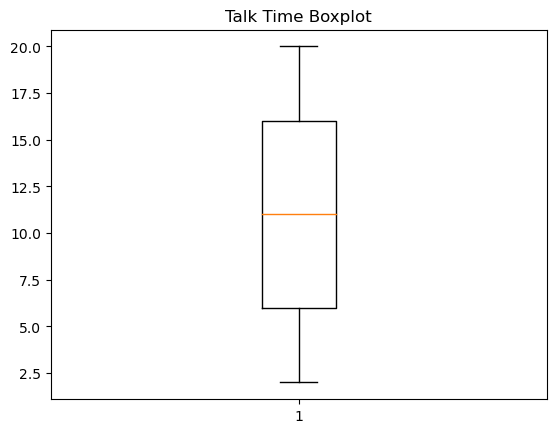

In [18]:
plt.boxplot(mobile.talk_time)
plt.title("Talk Time Boxplot" )

In [19]:
mobile.describe()[numerical_cols].T

,count,mean,std,min,25%,50%,75%,max
battery_power,1995.0,1238.368421,439.152439,501.0,852.0,1225.0,1615.0,1998.0
clock_speed,1995.0,1.522155,0.816351,0.5,0.7,1.5,2.2,3.0
fc,1995.0,4.305764,4.334525,0.0,1.0,3.0,7.0,19.0
int_memory,1995.0,32.029073,18.144471,2.0,16.0,32.0,48.0,64.0
m_dep,1995.0,0.501504,0.288579,0.1,0.2,0.5,0.8,1.0
mobile_wt,1995.0,140.250627,35.385105,80.0,109.0,141.0,170.0,200.0
pc,1995.0,9.915288,6.064460,0.0,5.0,10.0,15.0,20.0
px_height,1995.0,644.709273,443.964730,0.0,282.0,564.0,946.5,1960.0
px_width,1995.0,1251.415038,432.407310,500.0,874.5,1247.0,1633.0,1998.0
ram,1995.0,2124.915288,1085.402743,256.0,1207.0,2147.0,3067.0,3998.0


**Findings from Above Table/Graphs:**<br>

We can see that minimum value of Front Camera mega pixels (fc) and Primary Camera mega pixels (pc) are 0, which refers to **"NO Front/Primary Camera"**.<br> This makes sense, and I do not see that any modification is necessary.

**However, below listed are concerning:**
- Minimum value of Pixel Resolution Height (px_height) is 0.
- Minimum value of Screen Width of mobile in cm (sc_w) is 0.
- Some predictor variables have outliers.

In [20]:
# Checking how many observations match the above criterion.
mobile.loc[(mobile.px_height == 0) | (mobile.sc_w == 0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33.0,0.6,159,4,...,607,748.0,1482.0,18,0,2,1.0,0,0,1
24,503,0,1.2,1,5,1,8.0,0.4,111,3,...,201,1245.0,2583.0,11,0,12,1.0,0,0,1
33,1310,1,2.2,1,0,1,51.0,0.6,100,4,...,178,1919.0,3845.0,7,0,12,1.0,1,0,3
42,1253,1,0.5,1,5,1,5.0,0.2,152,2,...,685,714.0,1878.0,15,0,4,1.0,1,0,1
50,1547,1,3.0,1,2,1,14.0,0.7,198,3,...,1042,1832.0,2059.0,5,0,15,1.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,591,1,0.5,1,1,1,16.0,0.9,90,6,...,892,1603.0,3746.0,5,0,5,1.0,1,0,3
1933,897,1,2.0,0,3,1,2.0,0.6,154,8,...,0,994.0,1958.0,7,5,7,1.0,1,0,1
1946,590,1,1.2,1,0,0,32.0,0.4,141,6,...,227,509.0,1817.0,10,0,6,0.0,1,0,0
1954,686,1,2.7,1,0,0,36.0,0.1,194,4,...,64,745.0,1503.0,10,0,13,0.0,0,0,0


## 1.3 Data Exploration - Statistical Descriptions of Categorical Variables

array([[<Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'four_g'}>],
       [<Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>,
        <Axes: title={'center': 'n_cores'}>, <Axes: >]], dtype=object)

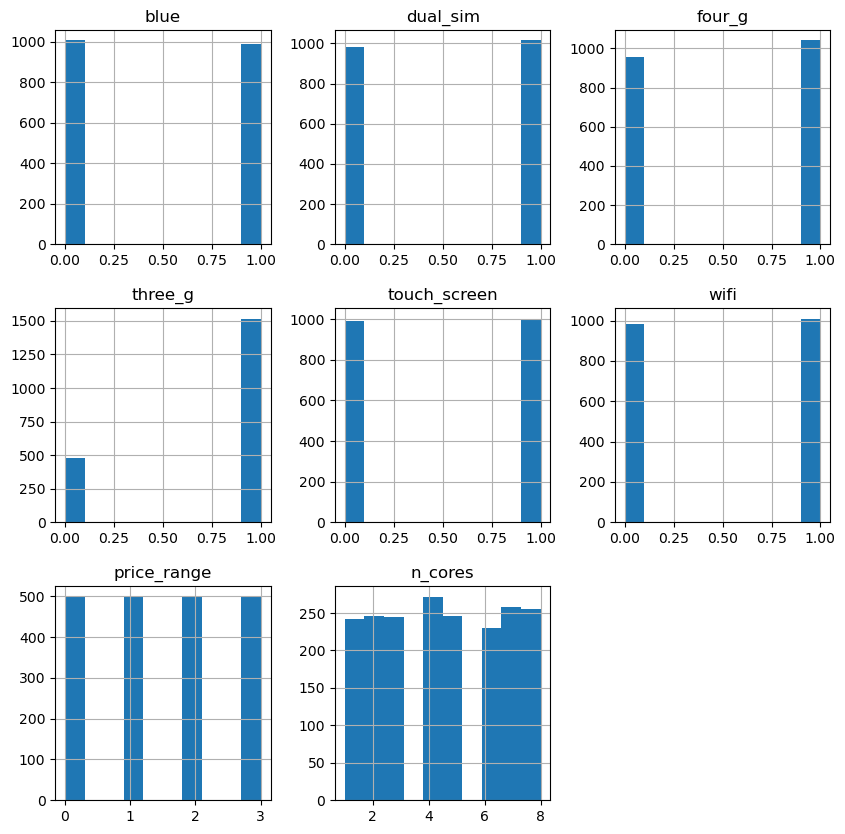

In [21]:
mobile[categorical_cols].hist(figsize=(10,10))

In [22]:
mobile.describe()[categorical_cols].T

,count,mean,std,min,25%,50%,75%,max
blue,1995.0,0.495739,0.500107,0.0,0.0,0.0,1.0,1.0
dual_sim,1995.0,0.508772,0.500048,0.0,0.0,1.0,1.0,1.0
four_g,1995.0,0.521805,0.499650,0.0,0.0,1.0,1.0,1.0
three_g,1995.0,0.760902,0.426639,0.0,1.0,1.0,1.0,1.0
touch_screen,1995.0,0.502757,0.500118,0.0,0.0,1.0,1.0,1.0
wifi,1995.0,0.506266,0.500086,0.0,0.0,1.0,1.0,1.0
price_range,1995.0,1.500251,1.118538,0.0,0.5,2.0,2.5,3.0
n_cores,1995.0,4.521805,2.289022,1.0,3.0,4.0,7.0,8.0


### **Findings from Above Table/Graphs:**<br>

- We can see that 4 x price_range have same number of phone distributed (mobile phones are equally distributed among 4 x price ranges.)
- Nearly 75% of the phones have 3G.

## 1.4 Data Exploration - Correlation Between Variables

This is useful to check correlation between dependent variable and independent variables.<br>
AND most importantly to check correlation between independent variables especially for regression analysis to meet the assumption.

<Axes: >

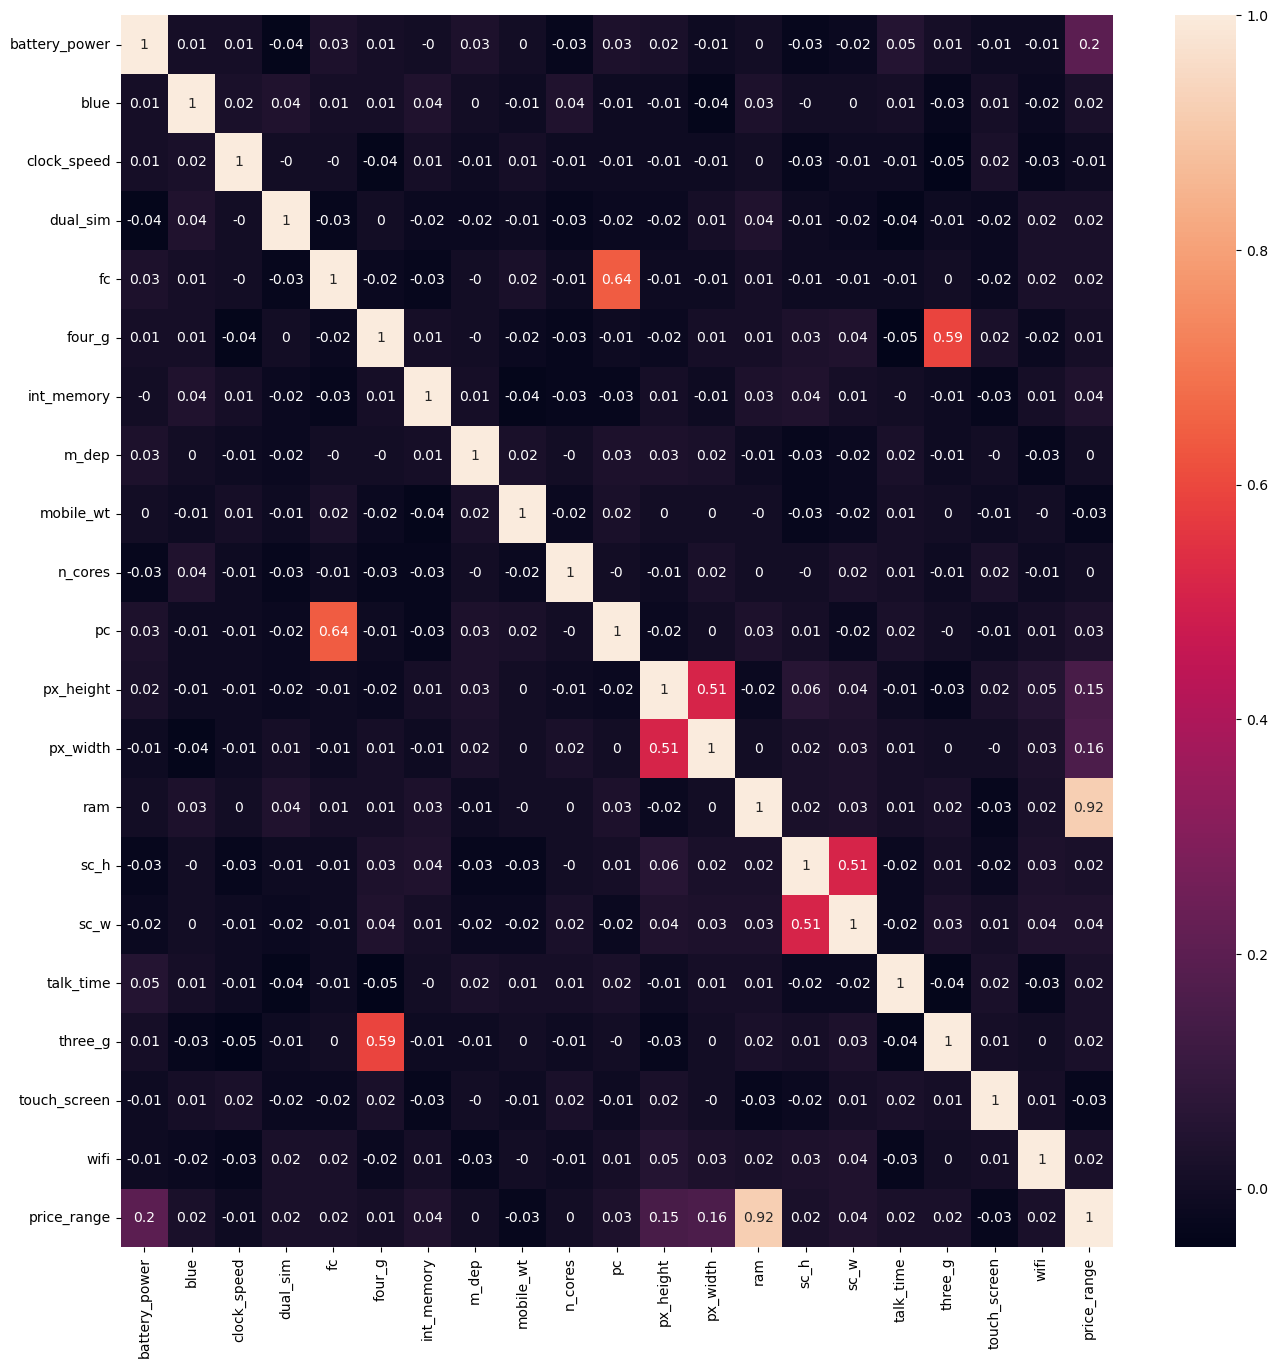

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = mobile.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(round(corr,2), annot=True)


**Findings:**

Several variables show correlation with the target variable (price_range):
- **ram**
- **battery_power**
- **px_width**
- **px_height**

Some variables are correlated to each other. (among independent variables):
- **fc & pc** with moderate correlation of **0.64**
- **four_g & three_g** with moderate correlation of **0.59**
- **px_height & px_width** with moderate correlation of **0.51**
- **sc_h & sc_w** with moderate correlation of **0.51**

Considering multicolinearity as well as abnormal values, we can drop feature variables such as "four_g", "fc", "px_height" and "sc_w".

## 1.5 Data Exploration - Feature Selecion

In here, we use SelectKBest to pick 8 best features that can be used for models.

From below, I will use features whose score is significantly higher than others, and they are:
- ram
- px_height
- battery_power
- px_width
- mobile_wt
- int_memory

In [24]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

y = mobile.price_range
X = mobile.drop('price_range', axis=1)

#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(19,'Score'))  #print 10 best features

            Specs          Score
13            ram  929952.235768
11      px_height   17152.579178
0   battery_power   14410.608161
12       px_width    9704.204232
8       mobile_wt      91.467952
6      int_memory      90.382730
15           sc_w      15.528211
16      talk_time      13.418946
14           sc_h       9.510976
9         n_cores       9.148338
4              fc       8.948516
10             pc       8.196502
18   touch_screen       2.054694
5          four_g       1.627386
7           m_dep       0.771799
2     clock_speed       0.737248
1            blue       0.734631
3        dual_sim       0.591551
19           wifi       0.501412


/Users/ariankalantari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Ram distribution for each price range')

<Figure size 1200x600 with 0 Axes>

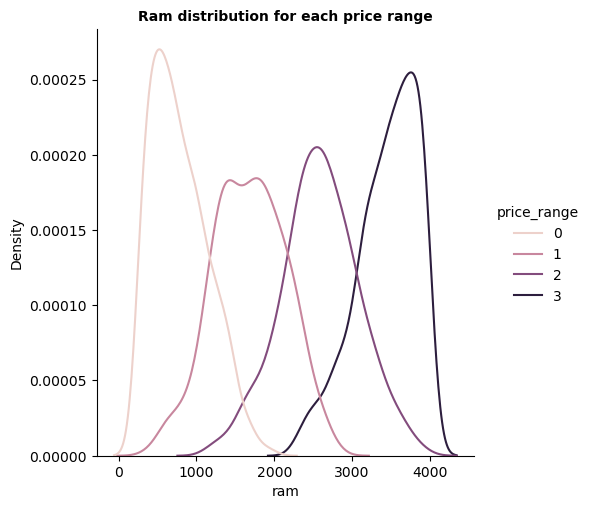

In [25]:
plt.figure(figsize=(12, 6))

sns.displot(x='ram', hue="price_range", data=df, kind="kde")
plt.title("Ram distribution for each price range",fontweight="bold", size=10)
# plt.show()

# 2. Dataset Preparation for Model Training

As we have no domain knowledge, we will not drop the column 'sc_w' or 'px_height' even when some value is equal to 0.
For the variables that are moderately correlated, we will keep them in the dataset as it contributes well to the prediction of mobile price_range.

But we are dropping some features that do not contribute to target variable's prediction much. 

## 2.1 Defining Main Dataset for the Project

In [26]:
featured_col = ['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt', 'int_memory']

target = 'price_range'

In [27]:
X = mobile[featured_col]

X.shape

(1995, 6)

In [28]:
y = mobile[target]

y.shape

(1995,)

## 2.2 Splitting the Dataset

In [267]:
from sklearn.model_selection import train_test_split

# We will split the dataset in a manner to keep the distribution of price_range.
X_trai,X_tes,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state = 7)

In [268]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1596, 6)
(1596,)
(399, 6)
(399,)


## 2.3 Standardising the Dataset

In [269]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_trai)
X_test  = scaler.transform(X_tes)

In [100]:
# Standardising was successful.
X_train[0]

array([ 1.11217097,  0.94127276,  1.60389543,  0.66331251, -0.78901883,
       -0.33935297])

# 3. Logistic Regression Model

In [101]:
import warnings
warnings.filterwarnings("ignore")

## 3.1 Model Training

In [102]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

predictions = log_model.predict(X_test)

## 3.2 Model Evaluation

### 3.2.1 Test Data

In [103]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.9774436090225563


In [104]:
from sklearn.metrics import classification_report

label = ['Price Range 0', 'Price Range 1', 'Price Range 2', 'Price Range 3']

print("Report on Test Data:")
print(classification_report(y_test, predictions, target_names=label))

Report on Test Data:
               precision    recall  f1-score   support

Price Range 0       0.96      0.99      0.98       100
Price Range 1       0.99      0.93      0.96        99
Price Range 2       0.97      0.99      0.98       100
Price Range 3       0.99      1.00      1.00       100

     accuracy                           0.98       399
    macro avg       0.98      0.98      0.98       399
 weighted avg       0.98      0.98      0.98       399



Confusion Matrix:


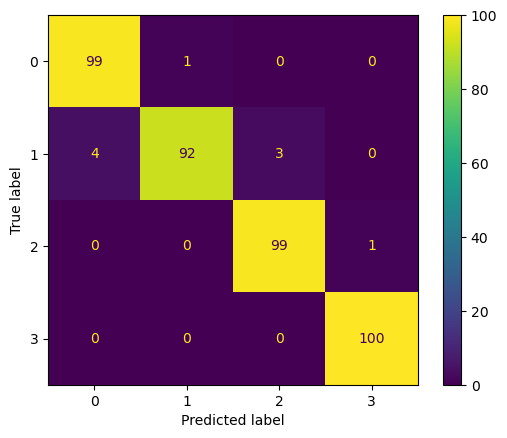

In [105]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=log_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()

print('Confusion Matrix:')
plt.show()

In [106]:
"""
F1 score
The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall).
The F1 score is also known as the Sørensen–Dice coefficient or Dice similarity coefficient (DSC).
"""

from sklearn.metrics import f1_score

print("Macro F1 Score: ",f1_score(y_test, predictions, average='macro'))
print("Micro F1 Score: ",f1_score(y_test, predictions, average='micro'))
print("Weighted F1 Score: ",f1_score(y_test, predictions, average='weighted'))

Macro F1 Score:  0.9772314217213207
Micro F1 Score:  0.9774436090225563
Weighted F1 Score:  0.9772787853513658


### 3.2.2 Training Data

In [107]:
train_predictions = log_model.predict(X_train)

print('Accuracy Score: ', accuracy_score(y_train, train_predictions))

Accuracy Score:  0.9786967418546366


In [108]:
print("Report on Training Data:")
print(classification_report(y_train, train_predictions, target_names=label))

Report on Training Data:
               precision    recall  f1-score   support

Price Range 0       0.99      0.99      0.99       399
Price Range 1       0.97      0.98      0.97       399
Price Range 2       0.97      0.95      0.96       399
Price Range 3       0.98      0.98      0.98       399

     accuracy                           0.98      1596
    macro avg       0.98      0.98      0.98      1596
 weighted avg       0.98      0.98      0.98      1596



Confusion Matrix:


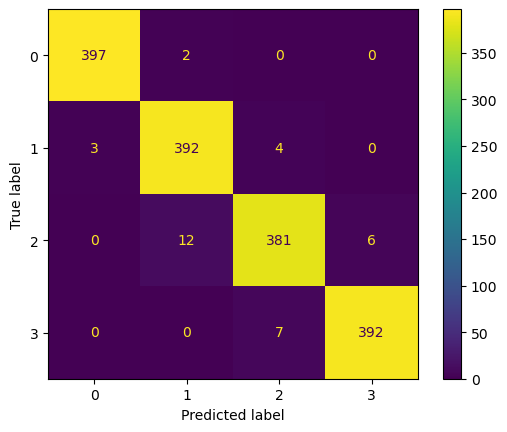

In [109]:
cm = confusion_matrix(y_train, train_predictions, labels=log_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()

print('Confusion Matrix:')
plt.show()

In [110]:
print("Macro F1 Score: ",f1_score(y_train, train_predictions, average='macro'))
print("Micro F1 Score: ",f1_score(y_train, train_predictions, average='micro'))
print("Weighted F1 Score: ",f1_score(y_train, train_predictions, average='weighted'))

Macro F1 Score:  0.9786704004332433
Micro F1 Score:  0.9786967418546366
Weighted F1 Score:  0.9786704004332434


## 3.3 Evaluation Report

Overall, the model's prediction accuracy on the test dataset is great this time with the accuracy score 0.977<br>
Confusion matrix (test dataset) shows that there was not much classification error.
- 1 x datapoint got wrongly classified as class 1 when it needed to be in class 0.
- 4 x datapoint got wrongly classified as class 0 when it needed to be in class 1.
- 3 x datapoint got wrongly classified as class 2 when it needed to be in class 1.
- 1 x datapoint got wrongly classified as class 3 when it needed to be in class 2.

Accuracy score is also very good on training dataset (0.978), and that is quite comparable to the test dataset, there is no question of overfitting.<br>
Confusion matrix (training dataset) shows great result as well.
- 397 x datapoints were classified correctly as price_range 0, but 2 got wrongly classified as price_range 1.
- 392 x datapoints were classified correctly as price_range 1, but 3 and 4 got wrongly classified as price_range 0 and 2 respectedly.
- 381 x datapoints were classified correctly as price_range 2, but 12 and 4 got wrongly classified as price_range 0 and 1 respectedly.
- 397 x datapoints were classified correctly as price_range 3, but 2 x datapoint got wrongly classified as price_range 1.


<BR>
    
**Thoughts:**

- One of Logistic Regression's assumptions "predictor variables are independent of each other" is possibly not met.<br>
- The otliers may have an impact on the model.<br>
- We could use all the features, and this would give us better accuracy.<br>
- The score and the precision looks very good, however we only did simple stratified train_test_split not cross-validation.<br>
- This could result in less-generalised model.

### 3.3.1 Trying Cross-Validation

In [111]:
from sklearn.linear_model import LogisticRegressionCV

log_model_2 = LogisticRegressionCV(cv=5)
log_model_2.fit(X_train, y_train)

predictions = log_model_2.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[99,  1,  0,  0],
       [ 3, 90,  6,  0],
       [ 0,  0, 99,  1],
       [ 0,  0,  1, 99]])

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9699248120300752

# 3. KNN Model

## 3.1 Model Training

### 3.1.1 Find the best k.

We first standardise the dataset so there will be less impact on the model as KNN uses distance between points and that can be influenced by scaling.

From below graph, we can see that the performance of the model went up to about 0.843 then decreased as k becomes bigger. The heighest score was at when k = 51, so we will set the n_neighbor=51. We used Cross Validation this time to generalise the model.

Meaning that our knn_model will be KNeighborsClassifier(n_neighbors=51) from now on to tune the hyper-parameter.

Text(0.5, 0, 'X')

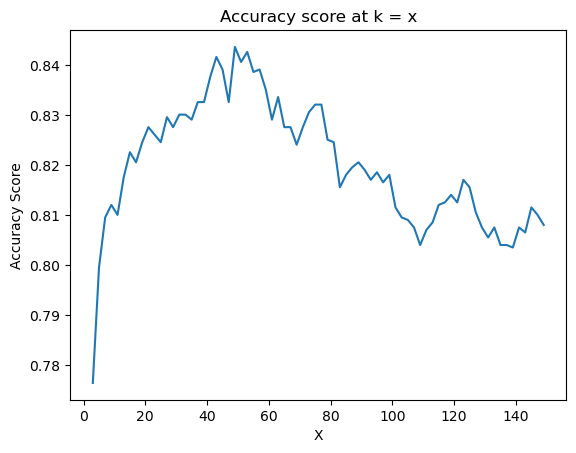

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

# Collect accuracy score at each K
accuracy = []

# Standardising Dataset
X_scaled = scaler.fit_transform(X)

for k in range(3,151,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    predictions = cross_val_predict(knn_model, X_scaled, y, cv=5)
    
    accuracy.append(accuracy_score(y, predictions))

# Plot the score at each K to determine which number to use as n_neighbors.
plt.plot(range(3,151,2),accuracy)
plt.title("Accuracy score at k = x")
plt.ylabel("Accuracy Score")
plt.xlabel("X")

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.pipeline import make_pipeline
import numpy as np

#Setup arrays to store training and test accuracies
neighbors = range(3,100,4)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


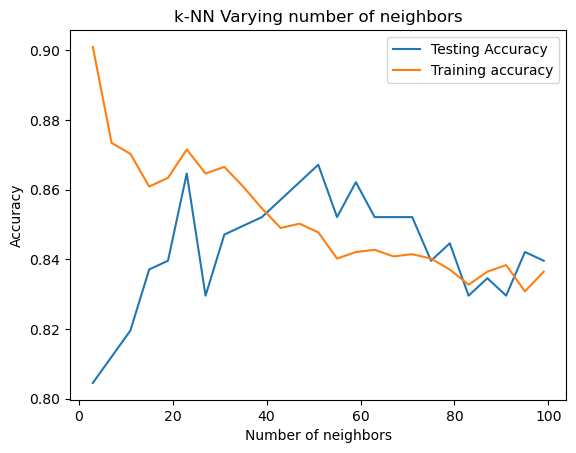

In [213]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### 3.1.2 Find the best k with GridSearch.

Using GridSearch to find the best k for the number of neighbors, and the result shows very similar number with the assumption made in early stage (51.)

Updating the number of neigbors and see if we can tune the model further.

In [229]:
from sklearn.model_selection import  GridSearchCV


param_grid={
    'n_neighbors': np.arange(11,80,2)
    }

In [219]:
grid = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=149),
             param_grid={'n_neighbors': array([11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
       45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77,
       79])},
             scoring='accuracy')

In [220]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.81002506 0.81754386 0.82255639 0.82055138 0.8245614  0.82756892
 0.82606516 0.8245614  0.82957393 0.82756892 0.83007519 0.83007519
 0.82907268 0.83258145 0.83258145 0.83759398 0.84160401 0.83909774
 0.83258145 0.84360902 0.8406015  0.84260652 0.83859649 0.83909774
 0.83508772 0.82907268 0.83358396 0.82756892 0.82756892 0.82406015
 0.82756892 0.83057644 0.8320802  0.8320802  0.82506266]


In [228]:
print(grid.cv_results_['std_test_score'])

[0.01091305 0.0143011  0.01673014 0.01573967 0.0096418  0.01580339
 0.01825277 0.01677514 0.01639642 0.00916074 0.01611823 0.01068034
 0.01262123 0.01114091 0.01421298 0.01019899 0.00943102 0.01394529
 0.01760819 0.01181937 0.01213405 0.0151541  0.01105033 0.00580242
 0.00929686 0.00580242 0.01203008 0.01358017 0.01068034 0.01114091
 0.01211333 0.01378218 0.01608702 0.01503759 0.01673014]


In [227]:
print('Best score', grid.best_score_, ' at ', grid.best_params_)

Best score 0.8436090225563909  at  {'n_neighbors': 49}


### 3.1.3 Hyper Parameter Tuning


In [232]:
param_grid={
    'n_neighbors': [49],
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
    }

In [233]:
grid = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=149),
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [49], 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [234]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.87869674 0.88922306 0.84360902 0.85463659 0.70275689 0.73433584
 0.70275689 0.73433584 0.87869674 0.88922306 0.84360902 0.85463659
 0.70225564 0.73433584 0.70225564 0.73433584 0.87869674 0.88922306
 0.84360902 0.85463659 0.70325815 0.7358396  0.70325815 0.7358396 ]


In [235]:
grid_std_scores = grid.cv_results_['std_test_score']
print(grid_std_scores)

[0.01331863 0.01732045 0.01181937 0.01002506 0.00701754 0.00808246
 0.00701754 0.00808246 0.01331863 0.01732045 0.01181937 0.01002506
 0.0076677  0.00838757 0.0076677  0.00838757 0.01331863 0.01732045
 0.01181937 0.01002506 0.00736689 0.00817519 0.00736689 0.00817519]


In [236]:
grid.best_score_

0.8892230576441102

In [238]:
grid.best_params_

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 49,
 'p': 1,
 'weights': 'distance'}

**Summary:**

Based on the above result, we are using parameters:
{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 49,
 'p': 1,
 'weights': 'distance'}
 
 
When K is too small, overfitting is a typical issue. And when K is way too big, then the model performance drops because it is too generaliased and the model cannot even tell difference between classes.

## 3.2 Model Evaluation

### 3.2.1 Test Data

In [253]:
knn = KNeighborsClassifier(leaf_size = 20, metric = 'minkowski', n_neighbors = 49, p = 1, weights = 'distance')
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.8972431077694235


In [254]:
from sklearn.metrics import classification_report

label = ['Price Range 0', 'Price Range 1', 'Price Range 2', 'Price Range 3']

print("Report on Test Data:")
print(classification_report(y_test, predictions, target_names=label))

Report on Test Data:
               precision    recall  f1-score   support

Price Range 0       0.95      0.94      0.94       100
Price Range 1       0.86      0.85      0.85        99
Price Range 2       0.84      0.87      0.85       100
Price Range 3       0.95      0.93      0.94       100

     accuracy                           0.90       399
    macro avg       0.90      0.90      0.90       399
 weighted avg       0.90      0.90      0.90       399



KNN Confusion Matrix:


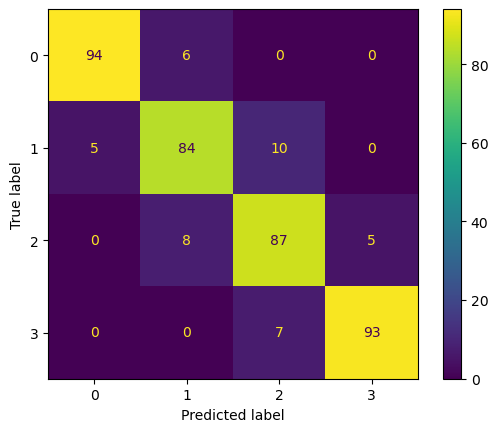

In [255]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

print('KNN Confusion Matrix:')
plt.show()

In [256]:
"""
F1 score
The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall).
The F1 score is also known as the Sørensen–Dice coefficient or Dice similarity coefficient (DSC).
"""

from sklearn.metrics import f1_score

print("Macro F1 Score: ",f1_score(y_test, predictions, average='macro'))
print("Micro F1 Score: ",f1_score(y_test, predictions, average='micro'))
print("Weighted F1 Score: ",f1_score(y_test, predictions, average='weighted'))

Macro F1 Score:  0.8974626530318922
Micro F1 Score:  0.8972431077694235
Weighted F1 Score:  0.8975746098611135


### 3.2.2 Training Data

In [257]:
train_predictions = knn.predict(X_train)

print('Accuracy Score: ', accuracy_score(y_train, train_predictions))

Accuracy Score:  1.0


In [258]:
print("Report on Training Data:")
print(classification_report(y_train, train_predictions, target_names=label))

Report on Training Data:
               precision    recall  f1-score   support

Price Range 0       1.00      1.00      1.00       399
Price Range 1       1.00      1.00      1.00       399
Price Range 2       1.00      1.00      1.00       399
Price Range 3       1.00      1.00      1.00       399

     accuracy                           1.00      1596
    macro avg       1.00      1.00      1.00      1596
 weighted avg       1.00      1.00      1.00      1596



Confusion Matrix:


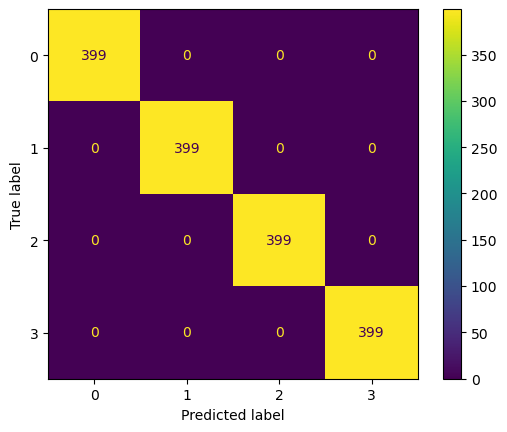

In [259]:
cm = confusion_matrix(y_train, train_predictions, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

print('Confusion Matrix:')
plt.show()

In [260]:
print("Macro F1 Score: ",f1_score(y_train, train_predictions, average='macro'))
print("Micro F1 Score: ",f1_score(y_train, train_predictions, average='micro'))
print("Weighted F1 Score: ",f1_score(y_train, train_predictions, average='weighted'))

Macro F1 Score:  1.0
Micro F1 Score:  1.0
Weighted F1 Score:  1.0


## 3.3 Evaluation Report

KNN model's prediction accuracy on the test dataset improved by about 5 points. Final Accuracy score we attained was nealy 90% after the hyper parameter tuning.<br>
Confusion matrix (test dataset) shows that there was not much classification error.
- 94 x datapoints were classified correctly as price_range 0, but 6 got wrongly classified as price_range 1.
- 84 x datapoints were classified correctly as price_range 1, but 5 and 10 got wrongly classified as price_range 0 and 2 respectedly.
- 87 x datapoints were classified correctly as price_range 2, but 8 and 5 got wrongly classified as price_range 1 and 3 respectedly.
- 93 x datapoints were classified correctly as price_range 3, but 7 got wrongly classified as price_range 2.

Applying the KNN on the training dataset returned the perfect accuracy as the model was trained on the exact dataset.


<BR>
    
**Interesting Finding:**

- When I used unscaled dataset, it returned much more accurate prediction.
- Why is it performing better? Thought scaling is very important when it comes to KNN.

In [271]:
knn = KNeighborsClassifier(leaf_size = 20, metric = 'minkowski', n_neighbors = 49, p = 1, weights = 'distance')
knn.fit(X_trai, y_train)

predictions = knn.predict(X_tes)

from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.9423558897243107


In [272]:
from sklearn.metrics import classification_report

label = ['Price Range 0', 'Price Range 1', 'Price Range 2', 'Price Range 3']

print("Report on Test Data:")
print(classification_report(y_test, predictions, target_names=label))

Report on Test Data:
               precision    recall  f1-score   support

Price Range 0       0.94      0.99      0.97       100
Price Range 1       0.94      0.92      0.93        99
Price Range 2       0.94      0.90      0.92       100
Price Range 3       0.95      0.96      0.96       100

     accuracy                           0.94       399
    macro avg       0.94      0.94      0.94       399
 weighted avg       0.94      0.94      0.94       399



KNN Confusion Matrix:


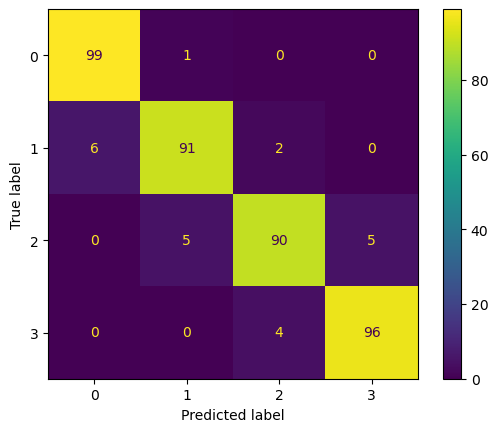

In [273]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

print('KNN Confusion Matrix:')
plt.show()